In [1]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


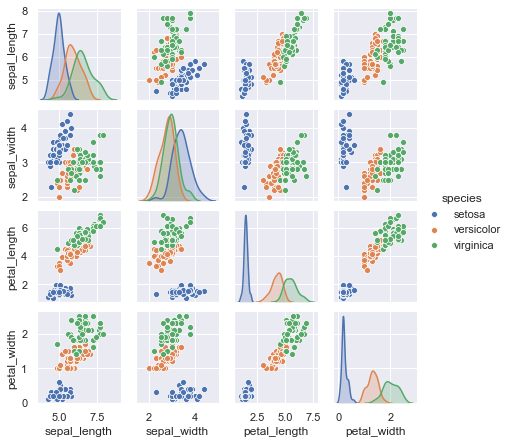

In [2]:
sns.set()
sns.pairplot(iris, hue="species", size=1.5)

In [3]:
x_iris = iris.drop("species", axis=1)
x_iris.shape

(150, 4)

In [4]:
y_iris = iris["species"]
y_iris.shape

(150,)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

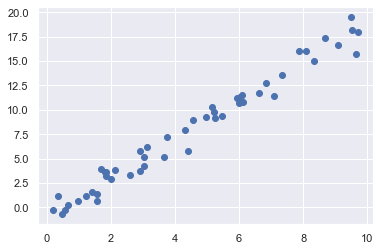

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

#  Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311092

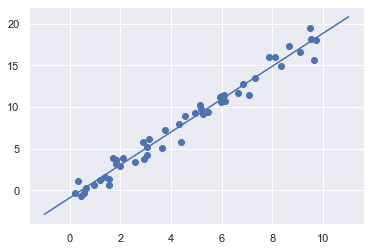

In [13]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

#  Naive_Bayes

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

#  Gaussian Mixture

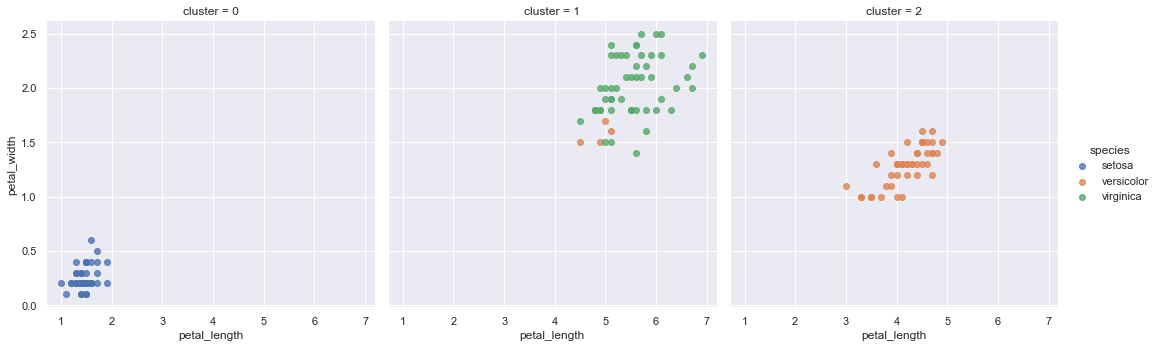

In [17]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type="full")
model.fit(x_iris)
y_gmm = model.predict(x_iris)
iris["cluster"] = y_gmm
sns.lmplot("petal_length", "petal_width", data=iris, hue="species", col="cluster", fit_reg=False)

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

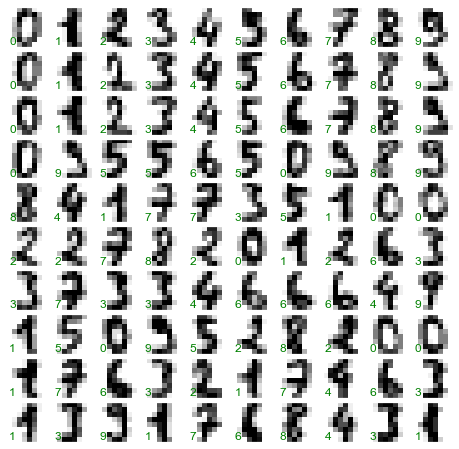

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], "yticks":[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color="green")

In [20]:
x = digits.data
x.shape

(1797, 64)

In [21]:
y = digits.target
y.shape

(1797,)

#  Isomap

In [22]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

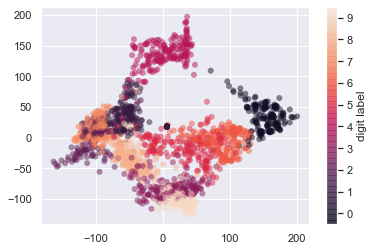

In [23]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor="none", alpha=0.5)
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5)

#  Gaussuan NB Naive Bayes

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
y_model = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

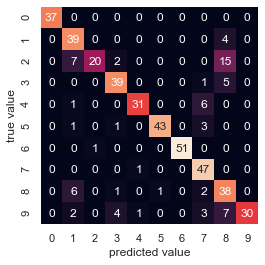

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")

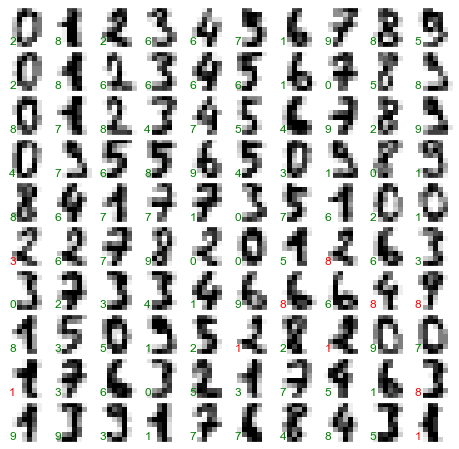

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={"xticks":[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color="green" if (ytest[i] == y_model[i]) else "red")

#  KNeighborsClassifier

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [28]:
from sklearn.model_selection import train_test_split
x1, x2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

In [29]:
model.fit(x1, y1)
y2_model = model.predict(x2)
from sklearn.metrics import accuracy_score
accuracy_score(y2, y2_model)

0.9066666666666666

In [30]:
y2_model = model.fit(x1, y1).predict(x2)
y1_model = model.fit(x2, y2).predict(x1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [32]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
scores.mean()

0.96

#  PolynomialFeatures

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [35]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1 / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

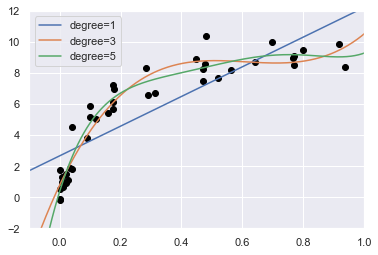

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(x_test)
    plt.plot(x_test.ravel(), y_test, label="degree={0}".format(degree))
plt.xlim(-.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")

#  Validate curve

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'score')

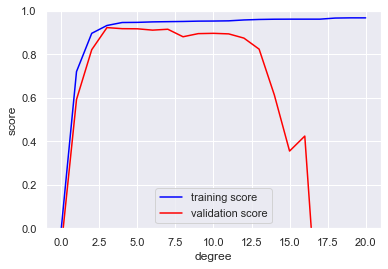

In [37]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

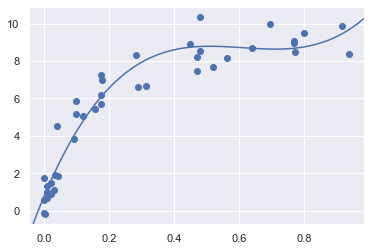

In [38]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(x_test)
plt.plot(x_test.ravel(), y_test)
plt.axis(lim)

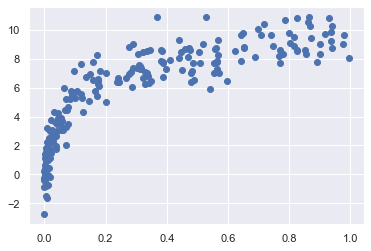

In [39]:
x2, y2 = make_data(200)
plt.scatter(x2.ravel(), y2)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'score')

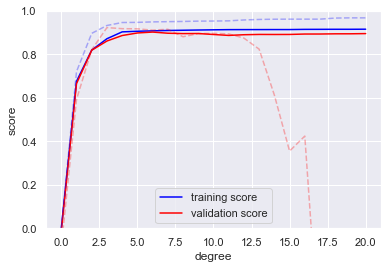

In [40]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), x2, y2, "polynomialfeatures__degree", degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label="training score")
plt.plot(degree, np.median(val_score2, 1), color='red', label="validation score")
plt.plot(degree, np.median(train_score, 1), color="blue", alpha=0.3, linestyle="dashed")
plt.plot(degree ,np.median(val_score, 1), color="red", alpha=0.3, linestyle="dashed")
plt.legend(loc="lower center")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

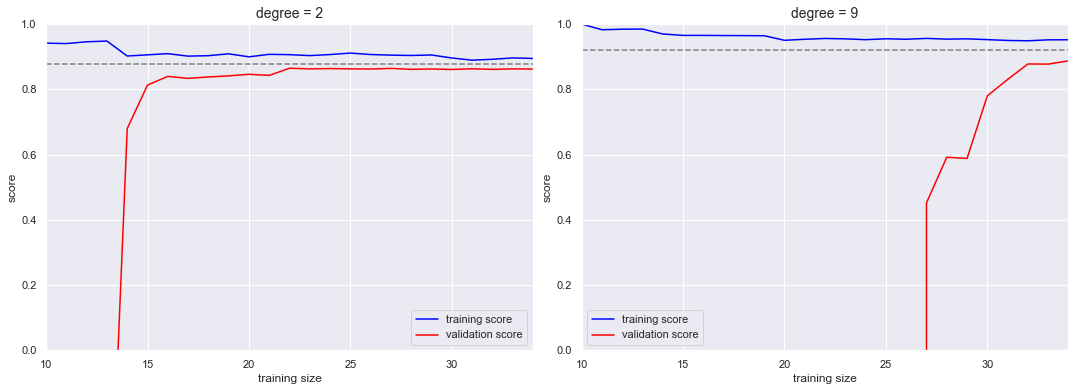

In [41]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color="blue", label="training score")
    ax[i].plot(N, np.mean(val_lc, 1), color="red", label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color="gray", linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel("training size")
    ax[i].set_ylabel("score")
    ax[i].set_title("degree = {0}".format(degree), size=14)
    ax[i].legend(loc="best")

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree':np.arange(21),
             'linearregression__fit_intercept':[True, False],
             'linearregression__normalize':[True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

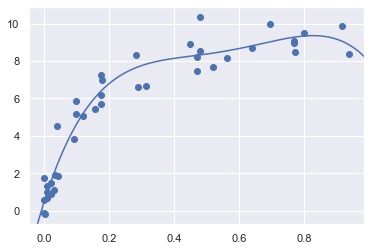

In [43]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(x_test)
plt.plot(x_test.ravel(), y_test)
plt.axis(lim)

#  Feature Engineering DictVectorizer

In [44]:
data = [
    {'price':850000, 'rooms':4, 'neighborhood':'Queen Anne'},
    {'price':700000, 'rooms':3, 'neighborhood':'Fremont'},
    {'price':650000, 'rooms':2, 'neighborhood':'Wellingford'},
    {'price':600000, 'rooms':2, 'neighborhood':'Fremont'}
]
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      2],
       [     1,      0,      0, 600000,      2]])

In [45]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wellingford',
 'price',
 'rooms']

In [46]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

#  CountVectorizer

In [47]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [48]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

#  TfidfVectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

# Derived features
add more add to make the model powerfull if we have the less data to fit the model in it by using polynomial featuring

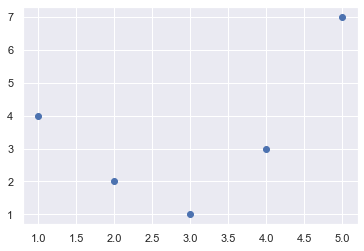

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

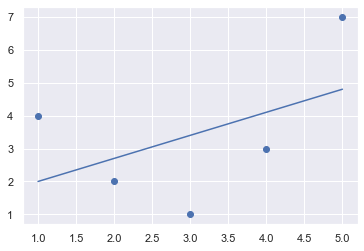

In [51]:
from sklearn.linear_model import LinearRegression
x = x[:, np.newaxis]
model = LinearRegression().fit(x, y)
yfit = model.predict(x)
plt.scatter(x, y)
plt.plot(x, yfit)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
x2 = poly.fit_transform(x)
x2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

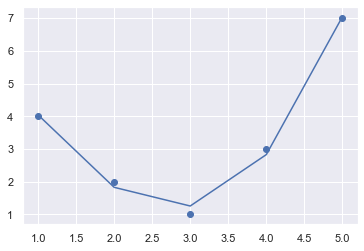

In [53]:
model = LinearRegression().fit(x2, y)
yfit = model.predict(x2)
plt.scatter(x, y)
plt.plot(x, yfit)

#  Imputer (Missing Data handling)

In [54]:
import numpy as np
x = np.array([
    [np.nan, 0, 3],
    [3, 7, 9],
    [3, 5, 2],
    [4, np.nan, 6],
    [8, 8, 1]
])
y = np.array([14, 16, -1, 8, -5])

In [55]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x2 = imp.fit_transform(x)
x2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x2, y)
model.predict(x2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

#  Feature Pipeline

In [57]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(missing_values = np.nan, strategy="mean"), PolynomialFeatures(degree=2), 
                      LinearRegression())
model.fit(x, y)
print(y)
print(model.predict(x))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


# Naive Bayes Classification 

In [58]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

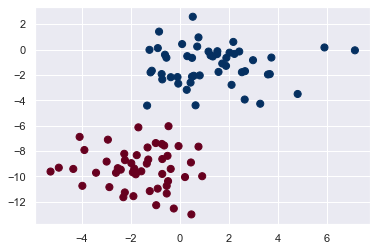

In [59]:
from sklearn.datasets import make_blobs
x, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='RdBu')

#  GaussianNB

In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y)
rng = np.random.RandomState(0)
xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(xnew)


array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

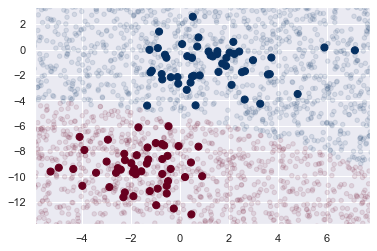

In [61]:
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(xnew[:, 0], xnew[:, 1], c=ynew, s=20, cmap="RdBu", alpha=0.1)
plt.axis(lim)
yprob = model.predict_proba(xnew)
yprob[-8:].round(2)

#  MultinomialNB

In [62]:
import pandas as pd
df = pd.read_csv("message_spam.csv")
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [63]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [64]:
df["spam"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)
df.head()

Category                                            Message  spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

In [65]:
df.drop("Category", axis=1)

Message  spam
0     Go until jurong point, crazy.. Available only ...     0
1                         Ok lar... Joking wif u oni...     0
2     Free entry in 2 a wkly comp to win FA Cup fina...     1
3     U dun say so early hor... U c already then say...     0
4     Nah I don't think he goes to usf, he lives aro...     0
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...     1
5568               Will ü b going to esplanade fr home?     0
5569  Pity, * was in mood for that. So...any other s...     0
5570  The guy did some bitching but I acted like i'd...     0
5571                         Rofl. Its true to its name     0

[5572 rows x 2 columns]

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df["Message"], df["spam"], test_size=0.3)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vec = CountVectorizer()
x = vec.fit_transform(xtrain.values)
pd.DataFrame(x.toarray(), columns=vec.get_feature_names()).shape

(3900, 7240)

In [68]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, ytrain)

MultinomialNB()

In [69]:
emails = ['Hey madam, can we get together to watch football game tomorrow?',
"upto 20% discount on parking, exclusive offer justfor you. Donot miss this reward"]
emaills = vec.transform(emails)

In [70]:
model.predict(emaills)

array([0, 1], dtype=int64)

In [71]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(xtest, ytest)
model.score(xtest, ytest)

0.9952153110047847

#  Linear Regression

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

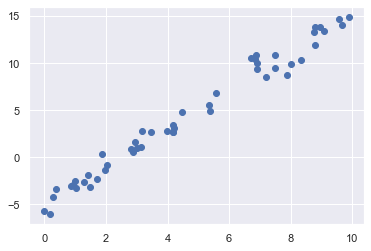

In [73]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

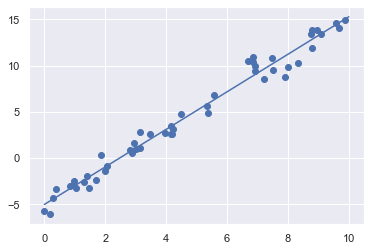

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [75]:
print("Model slope", model.coef_[0])
print("Model intercept", model.intercept_)

Model slope 2.027208810360694
Model intercept -4.998577085553198


In [76]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(x, [1.5, -2, 1])
model.fit(x, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000011
[ 1.5 -2.   1. ]


#  Polynomial Feature and basic Function and make_pipeline and compicated regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

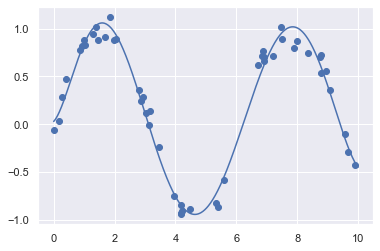

In [78]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

##  Gaussian basis functions

(0.0, 10.0)

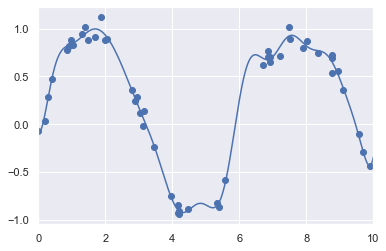

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    def _gauss_basis(self, x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y = None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

# Regularization

(-1.5, 1.5)

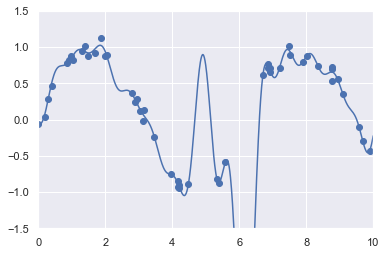

In [80]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

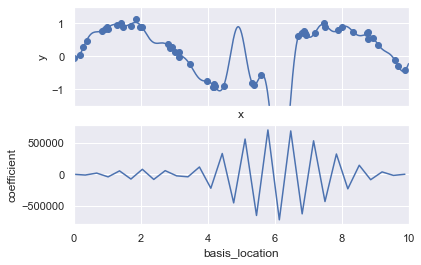

In [81]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel="basis_location", ylabel="coefficient", xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#  Ridge Regression (L2 regularization)

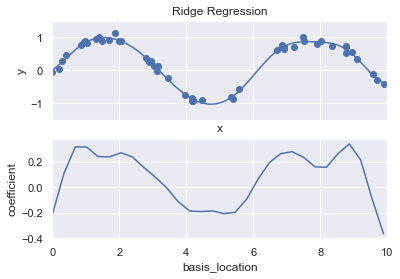

In [82]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title="Ridge Regression")

#  Lasso regularization (L1)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870484392, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


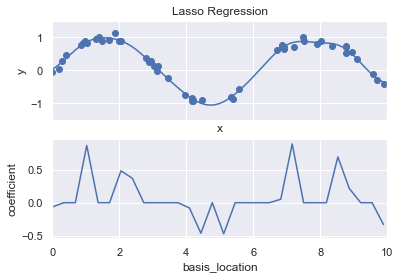

In [83]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title="Lasso Regression")

#  Predicting Bycycle Traffic

In [84]:
import pandas as pd
counts = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col = 'Date', parse_dates=True)
weather = pd.read_csv("bicycleweather.csv", index_col="DATE", parse_dates=True)


In [85]:
daily = counts.resample('d').sum()
daily["total"] = daily.sum(axis=1)
daily = daily[['total']]

In [86]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek==i).astype(float)
daily

total  Mon  Tue  Wed  Thu  Fri  Sat  Sun
Date                                                  
2012-10-03  14084.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2012-10-04  13900.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2012-10-05  12592.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2012-10-06   8024.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2012-10-07   8568.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
...             ...  ...  ...  ...  ...  ...  ...  ...
2021-07-27   7108.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2021-07-28   7082.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2021-07-29   6564.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2021-07-30   6222.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2021-07-31   4986.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[3224 rows x 8 columns]

In [87]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily["holiday"].fillna(0, inplace=True)

In [88]:
daily.holiday.unique()

array([0., 1.])

In [89]:
daily

total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday
Date                                                           
2012-10-03  14084.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0
2012-10-04  13900.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0
2012-10-05  12592.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0
2012-10-06   8024.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0
2012-10-07   8568.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0
...             ...  ...  ...  ...  ...  ...  ...  ...      ...
2021-07-27   7108.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0
2021-07-28   7082.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0
2021-07-29   6564.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0
2021-07-30   6222.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0
2021-07-31   4986.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0

[3224 rows x 9 columns]

<ipython-input-90-f47e6cb04136>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


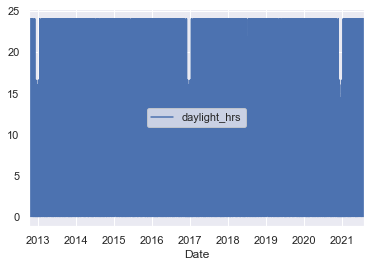

In [90]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.degrees(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily["daylight_hrs"] = list(map(hours_of_daylight, daily.index))
daily[["daylight_hrs"]].plot()

In [91]:
daily.head()

total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs
Date                                                                         
2012-10-03  14084.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     15.777079
2012-10-04  13900.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     10.781166
2012-10-05  12592.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0      5.403850
2012-10-06   8024.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0      0.000000
2012-10-07   8568.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0      0.000000

In [92]:
weather.head()

STATION                                STATION_NAME  \
DATE                                                                        
2012-01-01  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-02  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-03  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-04  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-05  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   

            PRCP  SNWD  SNOW  TMAX  TMIN  AWND  WDF2  WDF5  ...  WT17  WT05  \
DATE                                                        ...               
2012-01-01     0     0     0   128    50    47   100    90  ... -9999 -9999   
2012-01-02   109     0     0   106    28    45   180   200  ... -9999 -9999   
2012-01-03     8     0     0   117    72    23   180   170  ... -9999 -9999   
2012-01-04   203     0     0   122    56    47   180   190  ... -9999 -9999   
2012-01-05    13     0     0    89    28    61   200   220  ... -9999 -9999   

            WT02  WT22  WT04  WT13  WT16  WT08  WT18  WT03  
DATE                                                        
2012-01-01 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  
2012-01-02 -9999 -9999 -9999     1     1 -9999 -9999 -9999  
2012-01-03 -9999 -9999 -9999 -9999     1 -9999 -9999 -9999  
2012-01-04 -9999 -9999 -9999     1     1 -9999 -9999 -9999  
2012-01-05 -9999 -9999 -9999 -9999     1 -9999 -9999 -9999  

[5 rows x 25 columns]

In [93]:
weather["TMIN"] /= 10
weather["TMAX"] /= 10
weather["Temp (C)"] = 0.5 * (weather["TMIN"] + weather["TMAX"])
weather["PRCP"] /= 254
weather["dry day"] = (weather["PRCP"] == 0).astype(int)
daily = daily.join(weather[["PRCP", "Temp (C)", "dry day"]])
daily.head()

total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                            
2012-10-03  14084.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     15.777079   
2012-10-04  13900.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     10.781166   
2012-10-05  12592.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0      5.403850   
2012-10-06   8024.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0      0.000000   
2012-10-07   8568.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0      0.000000   

            PRCP  Temp (C)  dry day  
Date                                 
2012-10-03   0.0     13.35      1.0  
2012-10-04   0.0     13.60      1.0  
2012-10-05   0.0     15.30      1.0  
2012-10-06   0.0     15.85      1.0  
2012-10-07   0.0     15.85      1.0

In [94]:
daily["annual"] = (daily.index - daily.index[0]).days / 365.

In [95]:
daily.head()

total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                            
2012-10-03  14084.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     15.777079   
2012-10-04  13900.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     10.781166   
2012-10-05  12592.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0      5.403850   
2012-10-06   8024.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0      0.000000   
2012-10-07   8568.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0      0.000000   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-03   0.0     13.35      1.0  0.000000  
2012-10-04   0.0     13.60      1.0  0.002740  
2012-10-05   0.0     15.30      1.0  0.005479  
2012-10-06   0.0     15.85      1.0  0.008219  
2012-10-07   0.0     15.85      1.0  0.010959

In [96]:
daily.isnull().sum()

total              0
Mon                0
Tue                0
Wed                0
Thu                0
Fri                0
Sat                0
Sun                0
holiday            0
daylight_hrs       0
PRCP            2160
Temp (C)        2160
dry day         2160
annual             0
dtype: int64

In [97]:
daily.shape

(3224, 14)

In [98]:
daily["PRCP"].fillna(daily.PRCP.mean(), inplace=True)
daily["Temp (C)"].fillna(daily["Temp (C)"].mean(), inplace=True)
daily["dry day"].fillna(daily["dry day"].mean(), inplace=True)
daily.head()

total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                            
2012-10-03  14084.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     15.777079   
2012-10-04  13900.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     10.781166   
2012-10-05  12592.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0      5.403850   
2012-10-06   8024.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0      0.000000   
2012-10-07   8568.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0      0.000000   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-03   0.0     13.35      1.0  0.000000  
2012-10-04   0.0     13.60      1.0  0.002740  
2012-10-05   0.0     15.30      1.0  0.005479  
2012-10-06   0.0     15.85      1.0  0.008219  
2012-10-07   0.0     15.85      1.0  0.010959

In [99]:
daily.isnull().sum()

total           0
Mon             0
Tue             0
Wed             0
Thu             0
Fri             0
Sat             0
Sun             0
holiday         0
daylight_hrs    0
PRCP            0
Temp (C)        0
dry day         0
annual          0
dtype: int64

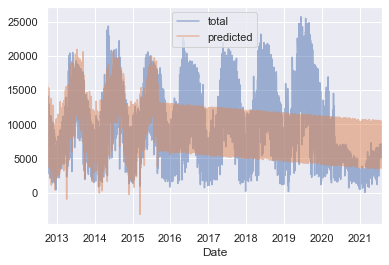

In [100]:
column_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "holiday", "daylight_hrs", "PRCP", "dry day", "Temp (C)", "annual"]
x = daily[column_names]
y = daily["total"]
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
daily["predicted"] = model.predict(x)
daily[["total", "predicted"]].plot(alpha=0.5)

In [101]:
params = pd.Series(model.coef_, index=x.columns)
params

Mon             6636.793148
Tue             7294.258830
Wed             7284.587590
Thu             6699.347104
Fri             5589.978828
Sat              833.319798
Sun              608.643585
holiday        -5574.844159
daylight_hrs      16.663789
PRCP           -2927.299661
dry day         2519.780394
Temp (C)         448.689290
annual          -450.771456
dtype: float64

In [102]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(x, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({"effect":params.round(0), "error":err.round(0)}))

              effect  error
Mon           6637.0  303.0
Tue           7294.0  291.0
Wed           7285.0  290.0
Thu           6699.0  288.0
Fri           5590.0  281.0
Sat            833.0  253.0
Sun            609.0  256.0
holiday      -5575.0  611.0
daylight_hrs    17.0    8.0
PRCP         -2927.0  291.0
dry day       2520.0  161.0
Temp (C)       449.0   12.0
annual        -451.0   30.0


#  Support Vector Machines

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

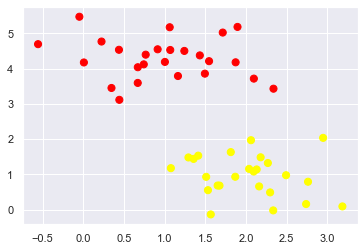

In [104]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

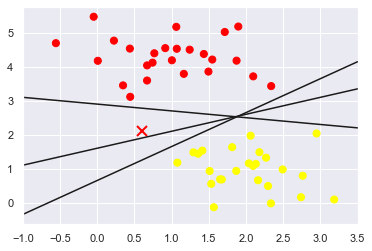

In [105]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)

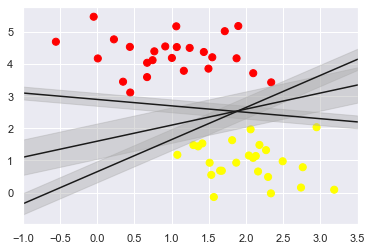

In [106]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color="#AAAAAA", alpha=0.4)
    plt.xlim(-1, 3.5)

In [107]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

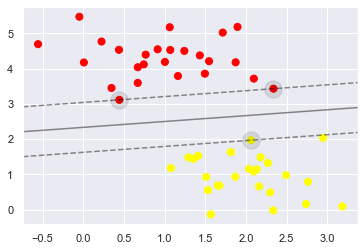

In [108]:
def plot_svc_decision_function(model, ax = None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none', c="black", alpha=0.1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [109]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

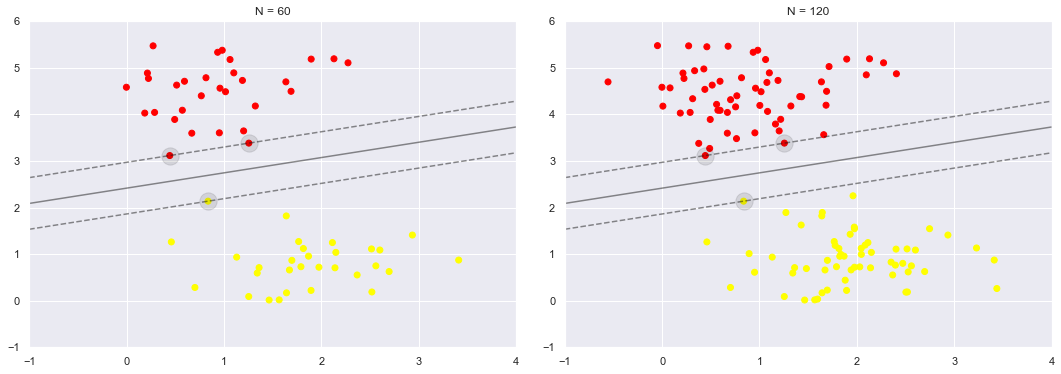

In [110]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax=ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [111]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

### Body Linear Boundaries: kernel SVM

In [112]:
from sklearn.datasets import make_circles

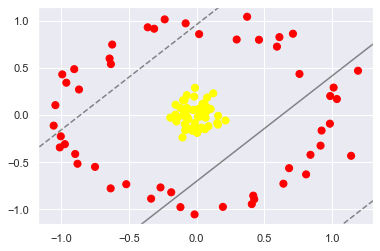

In [113]:
X, y = make_circles(100, factor=.1, noise = .1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [114]:
r = np.exp(-(X ** 2).sum(1))

In [115]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.06211794, -0.1490112 ],
       [ 0.12297532,  0.23059342],
       [-0.19425013, -0.0269293 ],
       [ 0.41830009, -0.85321276],
       [ 0.01873011,  0.85844556],
       [-0.3608863 ,  0.93063466],
       [-0.15521441,  0.10992893],
       [-1.05495613, -0.11134532],
       [-0.03040224, -0.16599263],
       [-1.00962143, -0.3423305 ],
       [ 0.29590663,  0.80137165],
       [-0.10426127, -0.23675108],
       [-0.02531399,  0.05479767],
       [-0.96159119,  0.3436931 ],
       [-0.0841429 , -0.16035407],
       [-0.06574895, -0.02546562],
       [-0.08084637,  0.97274285],
       [-1.00232551, -0.22485721],
       [ 0.01420531, -0.01574272],
       [ 0.84064289, -0.42064091],
       [-0.07254221,  0.2113794 ],
       [-0.06986825,  0.0590276 ],
       [-0.01492257, -1.05240471],
       [-0.31329185,  0.91549284],
       [ 0.37305535,  1.04259074],
       [ 0.15725064, -0.10080857],
       [ 0.61139568,  0.82678032],
       [

In [116]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

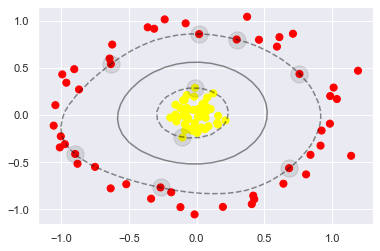

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

###  Tuning the SVM: Softening margins

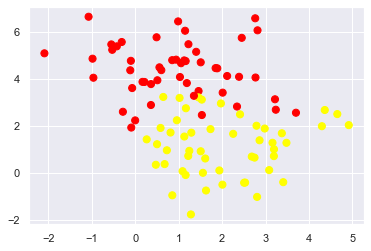

In [118]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

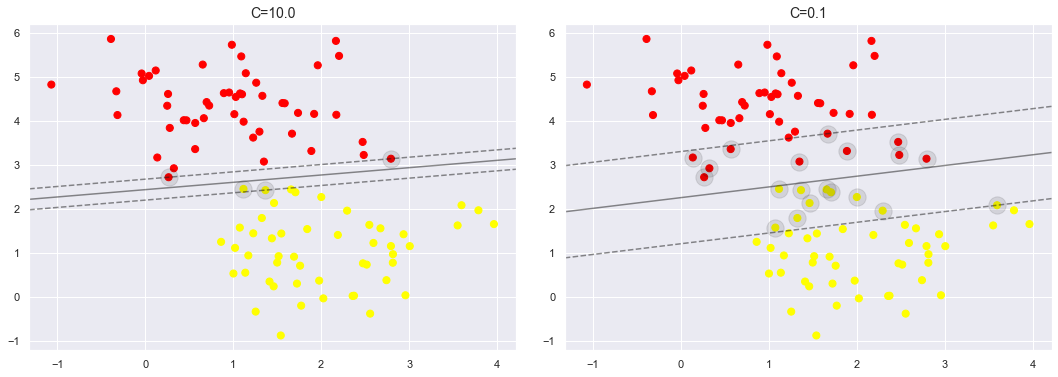

In [119]:
X, y = make_blobs(n_samples=100, cluster_std=0.8, centers=2, random_state=0)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, c in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=c).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.set_title("C={0:.1f}".format(c), size=14)

### Face Recognition

In [120]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi'
 'Tony Blair']
(964, 62, 47)


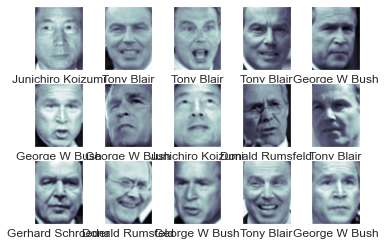

In [121]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [122]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [123]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [124]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C':[1, 5, 10, 50],
    'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 1min 30s
{'svc__C': 5, 'svc__gamma': 0.005}


In [126]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

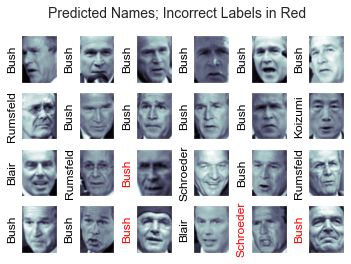

In [127]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap="bone")
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color="black" if yfit[i] == ytest[i] else "red")
    fig.suptitle("Predicted Names; Incorrect Labels in Red", size=14)

In [128]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.97      0.89      0.93        35
    George W Bush       0.89      0.98      0.93       130
Gerhard Schroeder       0.91      0.77      0.83        26
Junichiro Koizumi       1.00      0.79      0.88        14
       Tony Blair       0.94      0.86      0.90        36

         accuracy                           0.91       241
        macro avg       0.94      0.86      0.89       241
     weighted avg       0.92      0.91      0.91       241



Text(89.18, 0.5, 'predicted label')

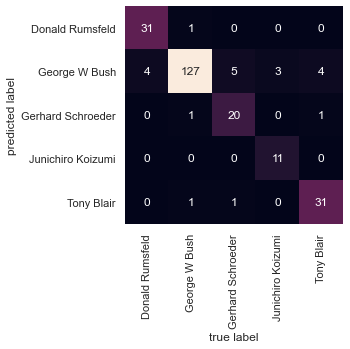

In [129]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels = faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel("predicted label")

# Decision Trees and Random Forests

In [130]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

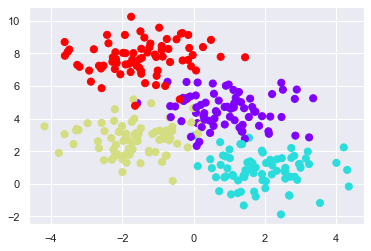

In [131]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [132]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

<ipython-input-133-208b32ad5dab>:12: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels = np.arange(n_classes + 1) - 0.5, cmap=cmap,


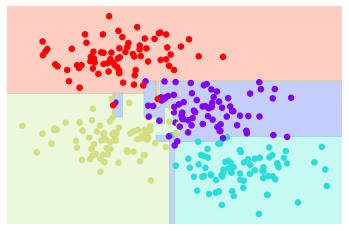

In [133]:
def visuallize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels = np.arange(n_classes + 1) - 0.5, cmap=cmap,
                            clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
visuallize_classifier(DecisionTreeClassifier(), X, y)

##  Ensemble

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

<ipython-input-133-208b32ad5dab>:12: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels = np.arange(n_classes + 1) - 0.5, cmap=cmap,


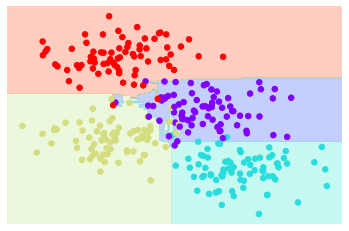

In [135]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visuallize_classifier(bag, X, y)

<ipython-input-133-208b32ad5dab>:12: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels = np.arange(n_classes + 1) - 0.5, cmap=cmap,


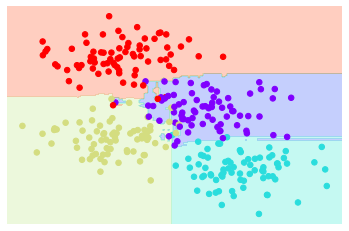

In [136]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visuallize_classifier(model, X, y)

# Random Forest Regression

In [137]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

<ErrorbarContainer object of 3 artists>

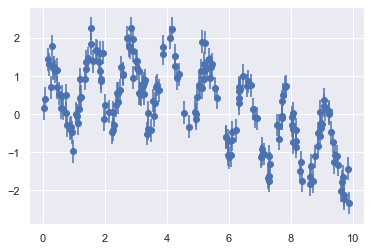

In [138]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

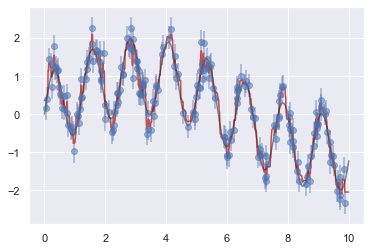

In [139]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

#  Random Forest Example

In [140]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

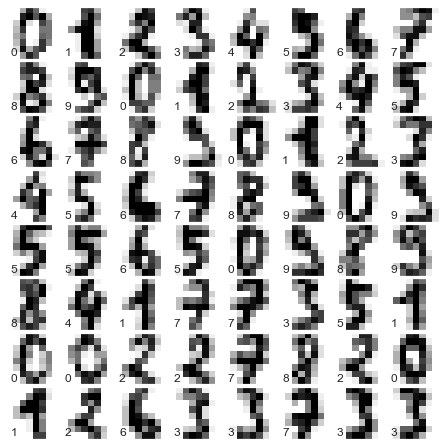

In [141]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [142]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

In [143]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [144]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.94      0.96        50
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.96      0.98      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'predicted label')

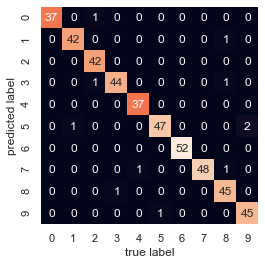

In [145]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, cbar = False)
plt.xlabel("true label")
plt.ylabel("predicted label")

#  Principal Component Analysis

In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-0.0455830817980441,
 1.141297509149081,
 -0.014895066196102034,
 0.3155191169807142)

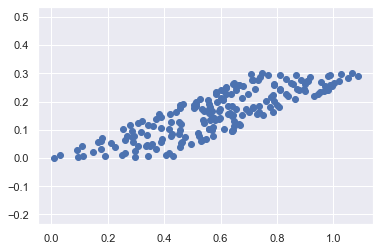

In [147]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.rand(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [149]:
pca.components_

array([[-0.9534372 , -0.30159162],
       [ 0.30159162, -0.9534372 ]])

In [150]:
pca.explained_variance_

array([0.06022031, 0.00197053])

(-0.0455830817980441,
 1.141297509149081,
 -0.014895066196102034,
 0.3155191169807142)

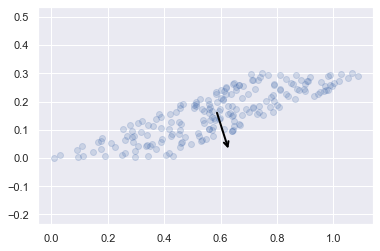

In [151]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis("equal")

In [152]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape", X.shape)
print("transformed shape", X_pca.shape)

original shape (200, 2)
transformed shape (200, 1)


(-0.0455830817980441,
 1.141297509149081,
 -0.037681430996035464,
 0.3326252648834045)

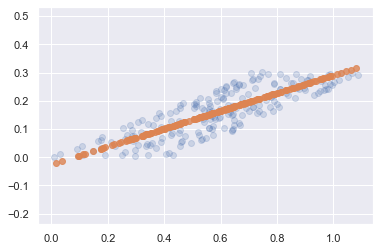

In [153]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [154]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [155]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


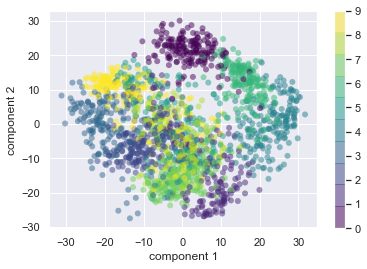

In [156]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

#### Choosing the number of components

Text(0, 0.5, 'cumulative explained variance')

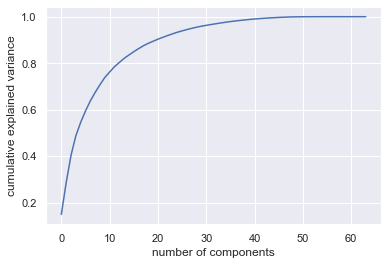

In [157]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel('cumulative explained variance')

## PCA as Noise Filtering

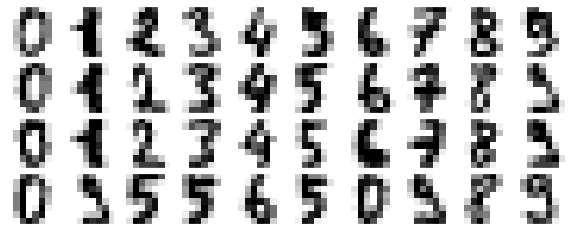

In [158]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap="binary", interpolation="nearest", clim=(0, 16))
plot_digits(digits.data)

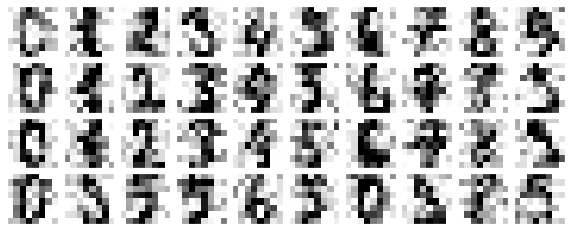

In [159]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [160]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

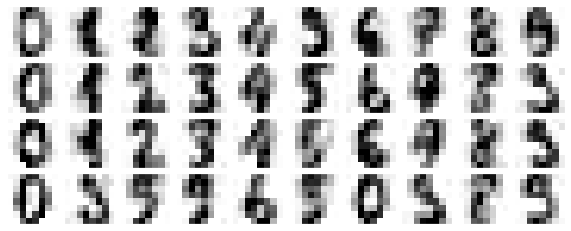

In [161]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

##  Example:Eigenfaces

In [162]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi'
 'Tony Blair']
(964, 62, 47)


In [163]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

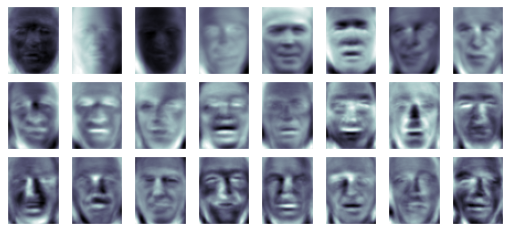

In [164]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap="bone")

Text(0, 0.5, 'cumulative explained variance')

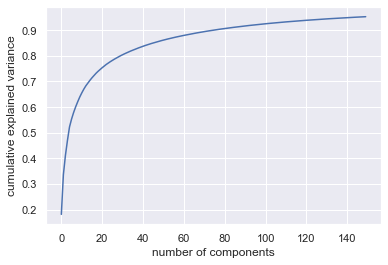

In [165]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [166]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

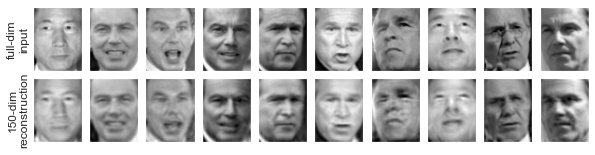

In [167]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]},
                     gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

#  Manifold Learning

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

(1000, 2)


(-0.1089571412684307,
 4.1303023353895725,
 0.0447585776140384,
 0.9990273515924064)

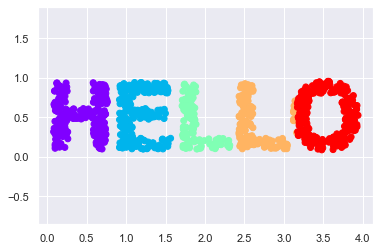

In [169]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, "HELLO", va='center', ha="center", weight='bold', size=85)
    fig.savefig("hello.png")
    plt.close(fig)
    
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j= (X*data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    print(X.shape)
    return X[np.argsort(X[:, 0])]
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

(4.607715441204515, 8.745900824125954, 5.035821528466808, 7.243272110369881)

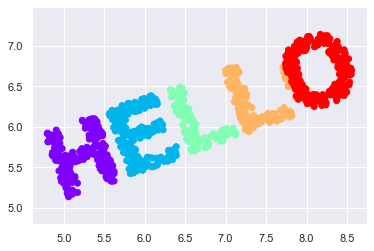

In [170]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

In [171]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

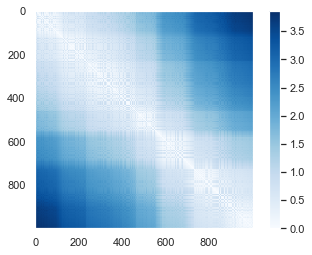

In [172]:
plt.imshow(D, zorder=2, cmap="Blues", interpolation="nearest")
plt.colorbar()

In [173]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

(-1.029149779948384, 1.027856768171942, -2.0494894050096306, 2.120281644043413)

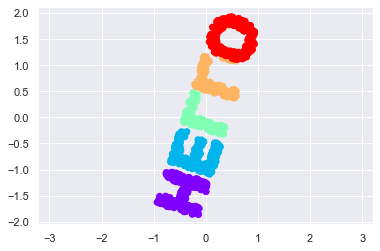

In [174]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

#  MDS as Manifold Learning

In [175]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

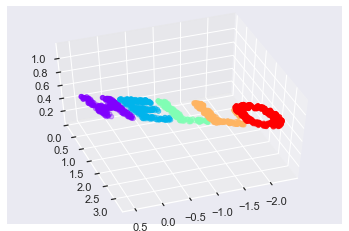

In [176]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(elev=50, azim = 70)

(-1.029149779948385,
 1.0278567681719433,
 -2.0494894050096297,
 2.120281644043412)

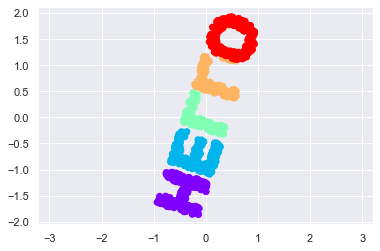

In [177]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis("equal")

#  Nonlinear Embeddings: Where MDS Fails

In [178]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)

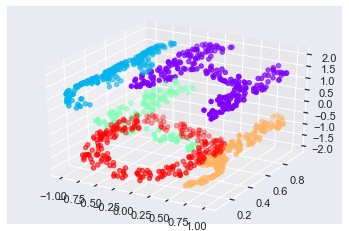

In [179]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

(-1.3805990015310614,
 1.239507132026126,
 -2.3703728177244114,
 2.1748093119140566)

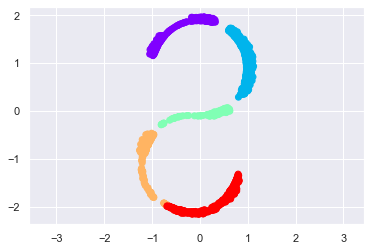

In [180]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

# Nonlinear Manifolds: Locally Linear Embedding

(0.15, -0.15)

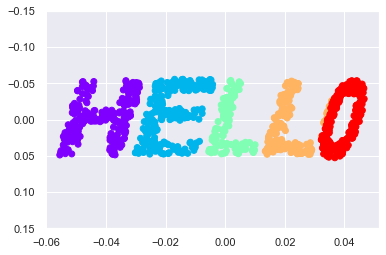

In [181]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method="modified", eigen_solver="dense")
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

# Isomap on Faces

In [182]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(1120, 2914)

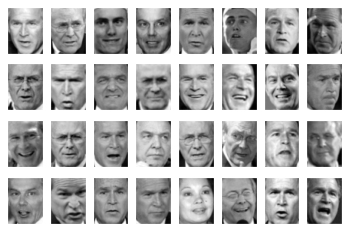

In [183]:
fig, ax = plt.subplots(4, 8, subplot_kw = dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gray")

Text(0, 0.5, 'cumulative variance')

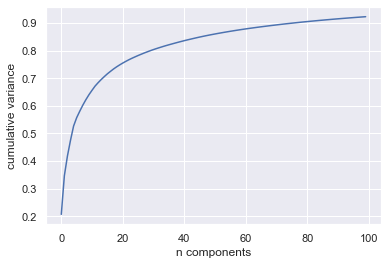

In [184]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel("n components")
plt.ylabel("cumulative variance")

In [185]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(1120, 2)

In [186]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
            ax.add_artist(imagebox)

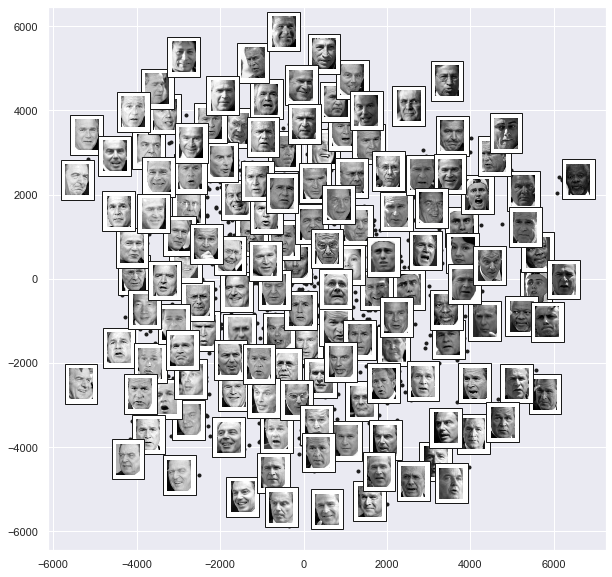

In [187]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

# K-Means Clustering

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

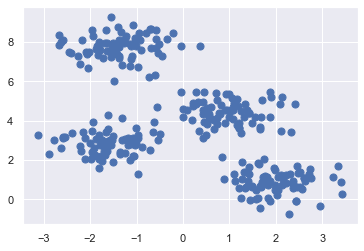

In [189]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [190]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
ymeans = kmeans.predict(X)

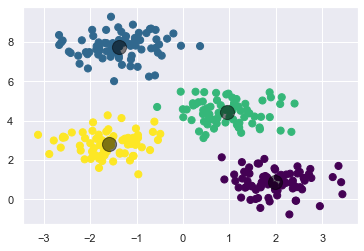

In [191]:
plt.scatter(X[:, 0], X[:, 1], c=ymeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

# K-means Algorithm: Expectation-Maximization

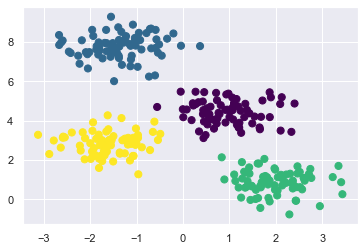

In [192]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 50, cmap="viridis")

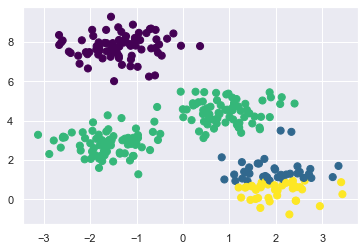

In [193]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 50, cmap='viridis')

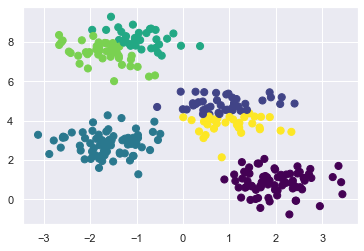

In [194]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

In [195]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

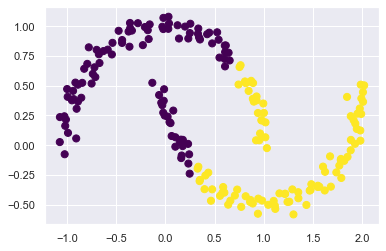

In [196]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [197]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", assign_labels='kmeans')

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


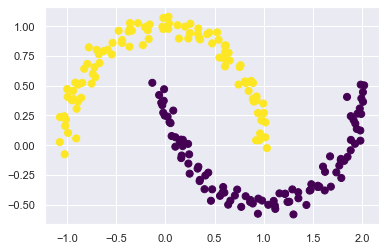

In [198]:
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Examples

In [199]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [200]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

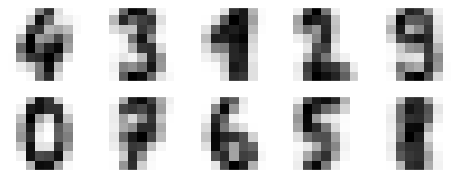

In [201]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [202]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

Text(89.18, 0.5, 'predicted label')

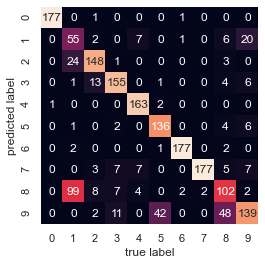

In [203]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [204]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target, labels)

0.9398998330550918

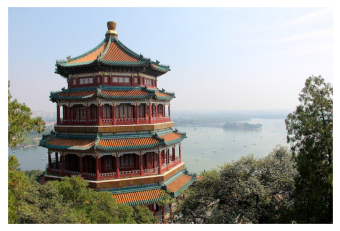

In [205]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [206]:
china.shape

(427, 640, 3)

In [207]:
data = china / 255
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

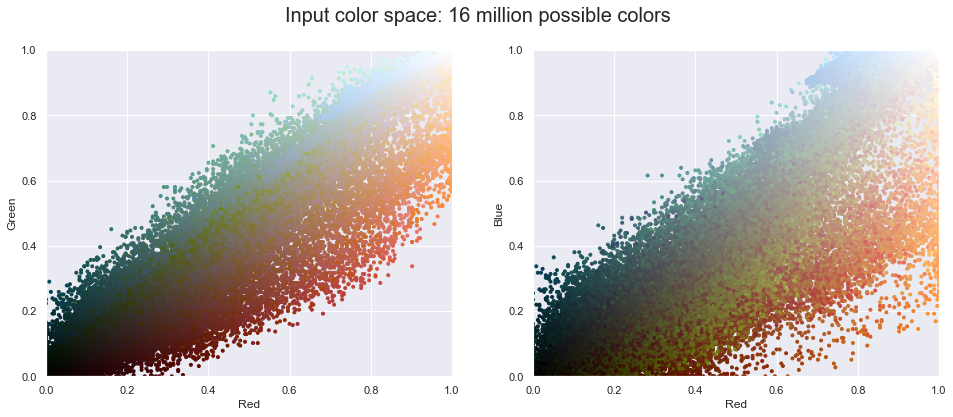

In [208]:
def plot_pixels(data, title, colors=None, N=100000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel="Red", ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel="Blue", xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20)
plot_pixels(data, title="Input color space: 16 million possible colors")

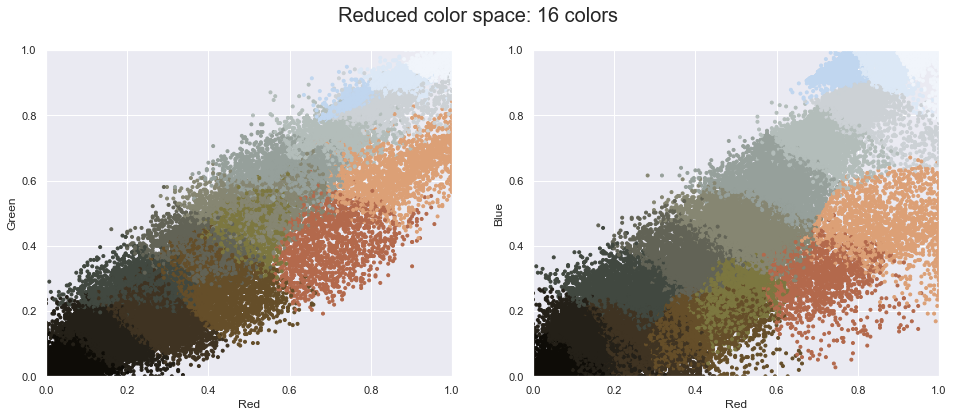

In [209]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16 color image')

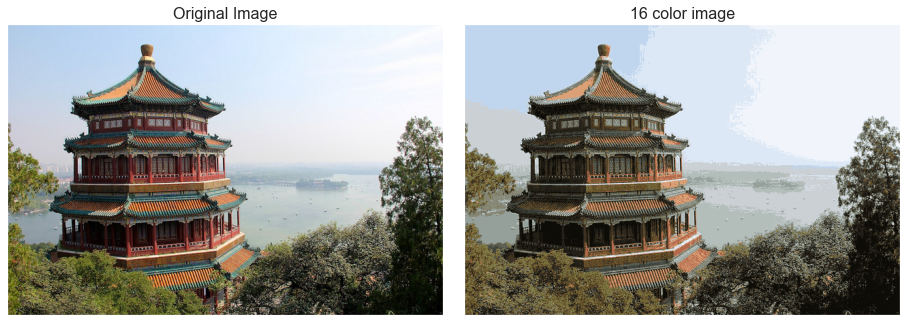

In [210]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16 color image", size=16)

# Gaussian Mixture Models

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Weakness of Kmeans

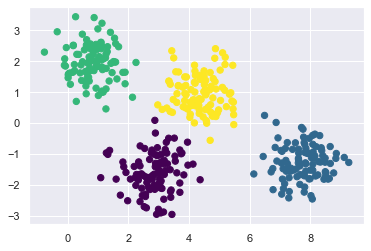

In [212]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [213]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

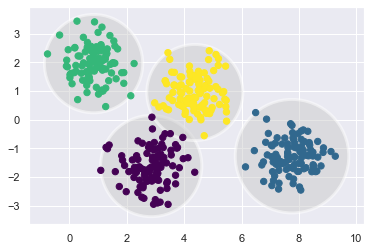

In [214]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

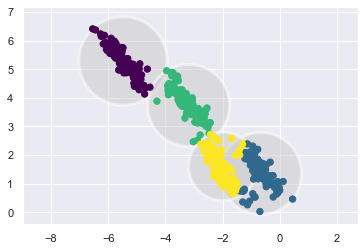

In [215]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

# Gaussian Mixture Models

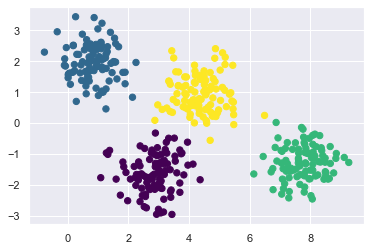

In [216]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [217]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.463 0.537]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


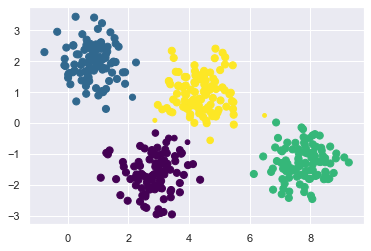

In [218]:
size = 50 * probs.max(1) ** 2
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

In [219]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2*np.sqrt(s)
    else:
        angle = 0
        width, height = 2* np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [220]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

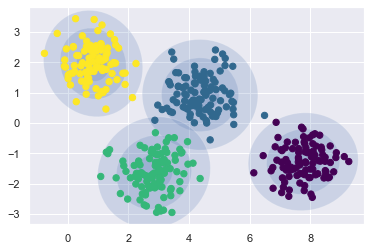

In [221]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

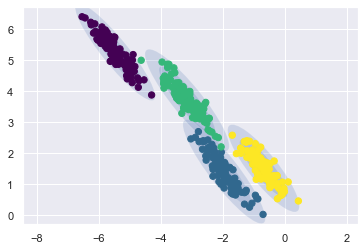

In [222]:
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
plot_gmm(gmm, X_stretched)

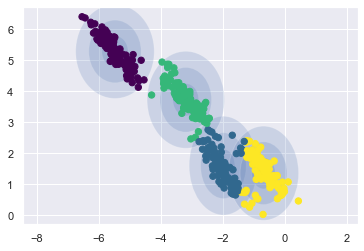

In [223]:
gmm = GaussianMixture(n_components=4, covariance_type="diag", random_state=42)
plot_gmm(gmm, X_stretched)

# GMM as Density Estimation

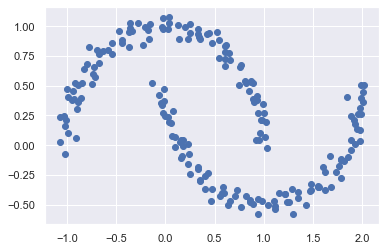

In [224]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

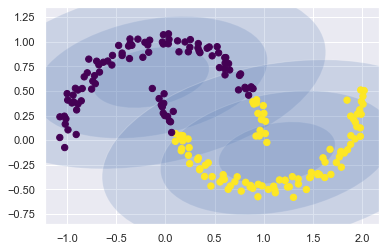

In [225]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

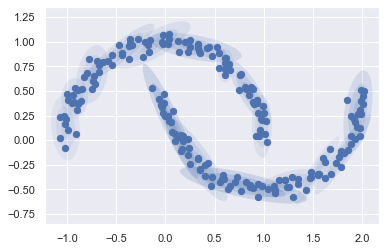

In [226]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

## How many components

Text(0.5, 0, 'n_components')

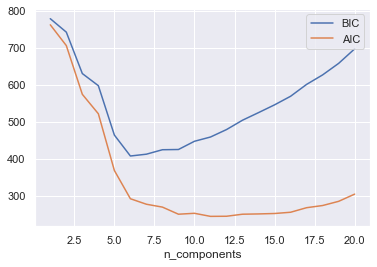

In [227]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type="full", random_state=0).fit(Xmoon) for n in n_components]
plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")

# Example

In [228]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

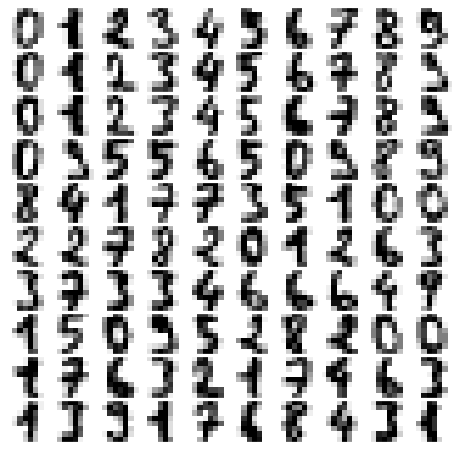

In [229]:
def plot_digits(data):
    fig, ax=plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [230]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

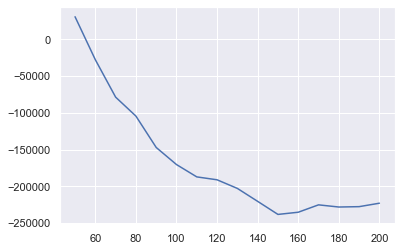

In [231]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type="full", random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [232]:
gmm = GaussianMixture(110, covariance_type="full", random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [233]:
data_new = gmm.sample(100)

In [234]:
data = data_new[0]
target = data_new[1]
newdata = np.asarray(data)
newdata

array([[ 2.05460282,  0.29935669, -0.73689762, ...,  0.03820449,
        -0.36519553, -0.95852014],
       [-0.81742878, -0.40651244,  2.5400511 , ...,  1.07594428,
         0.35430669, -1.21587324],
       [-0.39678825, -0.17016822,  2.03190661, ...,  0.02958898,
         0.96652491,  0.63027424],
       ...,
       [ 0.09633026, -1.18449918, -1.70117188, ..., -0.38253199,
        -0.60507223, -0.18213456],
       [ 1.48474322,  1.48483546,  1.12577593, ...,  1.37785733,
         1.38354732,  0.03036205],
       [ 1.45173887,  1.20488799,  1.56539613, ...,  0.21076484,
         0.18047218,  1.48337636]])

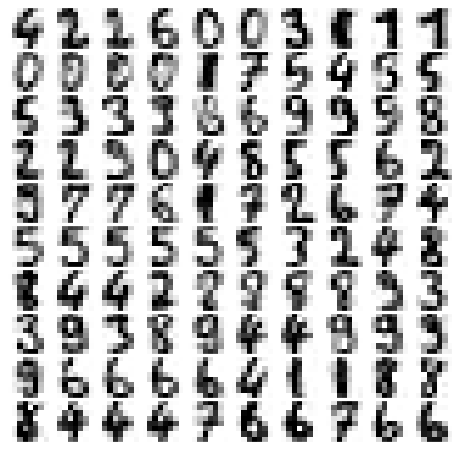

In [235]:
digits_new = pca.inverse_transform(newdata)
plot_digits(digits_new)

# Kernel Density Estimation

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Motivating KDE: Histograms

In [237]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)

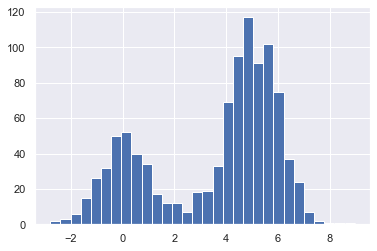

In [238]:
hist = plt.hist(x, bins=30)

In [239]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

391.7229234728167

In [240]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

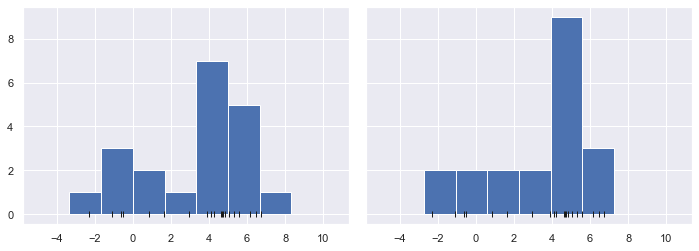

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

(-0.2, 8.0)

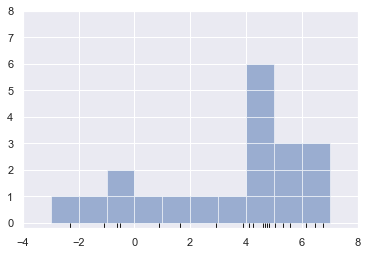

In [242]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

(-4.0, 8.0, -0.2, 8.0)

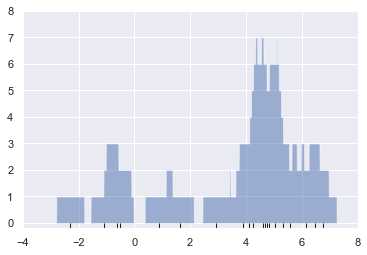

In [243]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8])

(-4.0, 8.0, -0.2, 5.0)

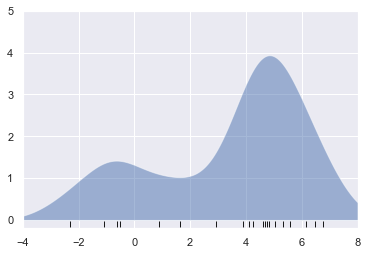

In [244]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)
plt.axis([-4, 8, -0.2, 5])

## Kernel Density Extimation in Practice

(-0.02, 0.22)

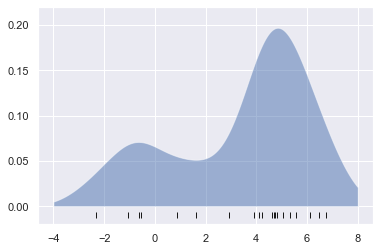

In [245]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

## Selecting the bandwidth via cross-validation

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel="gaussian"), {'bandwidth':bandwidths}, cv=LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.305385...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [247]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

# Face Detector

(964, 62, 47)